In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [2]:
df=pd.read_csv("loan_sin.csv")
df.head()

,age,loan_status
0,32,Approved
1,45,Approved
2,28,Denied
3,51,Approved
4,36,Approved


In [3]:
df.isnull().sum()

age            0
loan_status    0
dtype: int64

In [4]:
# handel categorical column loan_status
Ohe=OneHotEncoder()
df["loan_status"]=Ohe.fit_transform(df[["loan_status"]]).toarray()
df.head()

,age,loan_status
0,32,1.0
1,45,1.0
2,28,0.0
3,51,1.0
4,36,1.0


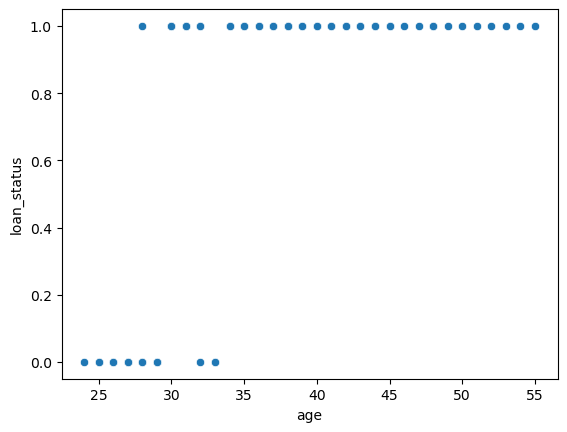

In [12]:
sns.scatterplot(data=df,x="age",y="loan_status")
plt.show()

In [5]:
# Extract Dependent and Independent variable
x=df[["age"]]
y=df[["loan_status"]]

In [7]:
# split data into training and testing set
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=23)

In [8]:
# train model
lr=LogisticRegression()
lr.fit(x_train,y_train)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [9]:
lr.predict(x_test)

array([1., 1., 1., 1., 0., 1., 1., 0., 1., 0., 0., 1., 1.])

In [11]:
lr.score(x_test,y_test)*100

76.92307692307693

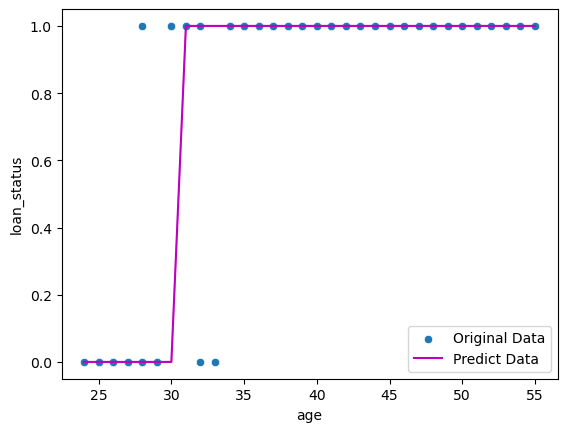

In [19]:
sns.scatterplot(data=df,x="age",y="loan_status",label="Original Data")
sns.lineplot(data=df,x="age",y=lr.predict(x),color="m",label="Predict Data")
plt.legend()
plt.show()